# 1. Plotting your STARLIGHT results

In [1]:
import atpy
import pystarlight.io.starlighttable #io.starlighttable #@UnusedImport
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [2]:
def plot_spectra(ts):
    '''
    Plot the observed, synthetic and residual spectra for the STARLIGHT fitting.
    '''
    
    # ++ limits
    # ++ pdf
    
    plotpars = {'legend.fontsize': 12,
                'xtick.labelsize': 14,
                'ytick.labelsize': 14,
                'text.fontsize': 14,
                'axes.titlesize': 14,
                'lines.linewidth': 1.,
                'font.family': 'Times New Roman',
                'image.cmap': 'GnBu',
                }
    plt.rcParams.update(plotpars)
    
    ll = ts.spectra.l_obs

    f_obs = ts.spectra.f_obs
    f_syn = ts.spectra.f_syn
    f_wei = ts.spectra.f_wei
    f_err = f_wei**-1
    f_res = (f_obs - f_syn) / f_obs
    
    ageBase = np.unique(ts.population.popage_base)
    ZBase = np.unique(ts.population.popZ_base)

    vmax = f_syn.max() * 1.1
    err_lim = 10.0
    
    plt.figure(2, figsize=(15, 8))
    
    plt.subplot(311)
    err = f_err
    f = f_obs
    err_scale = int(0.2 * f.mean() / err.mean())
    s = f_syn
    plt.plot(ll, f, 'k-', label='observed')
    plt.plot(ll, s, 'r-', label='synthetic')
    plt.ylabel(r'$F_\lambda$ (normalized @ $5635\,\AA$)')
    plt.xlabel(r'wavelength [$\AA$]')
    plt.xlim(ll.min(), ll.max())
    plt.ylim(0, 3.0*np.median(f))
    plt.legend(loc='upper right', frameon=False)
    
    plt.subplot(312)
    r = f_res
    w = f_wei
    err = f_err
    plt.plot(ll, r, 'k-')
    plt.plot(ll, np.zeros_like(ll), 'k:')
    
    fitted = np.ma.masked_where(w < 0, r)
    plt.plot(ll, fitted, 'b-')
    
    masked = np.ma.masked_where(w != 0, r)
    plt.plot(ll, masked, '-', color='magenta')
    
    clipped = np.ma.masked_where(w != -1, r)
    plt.plot(ll, clipped, 'x', color='red')
    
    flagged = np.ma.masked_where(w != -2, r)
    plt.plot(ll, flagged, '-', color='green')
    
    plt.ylabel(r'residual flux [%]')
    plt.xlabel(r'wavelength [$\AA$]')
    plt.ylim(-1, 1)
    plt.xlim(ll.min(), ll.max())
    plt.legend(loc='upper left', frameon=False)
    
    plt.subplot(313)
    popmu_cor = ts.population.popmu_cor.reshape([len(ZBase), len(ageBase)])
    plt.imshow(popmu_cor)
    plt.xlabel('Age base')
    plt.ylabel('Metallicity base')
    plt.title('popmu_cor')

    plt.gcf().set_tight_layout(True)

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in reciprocal
/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


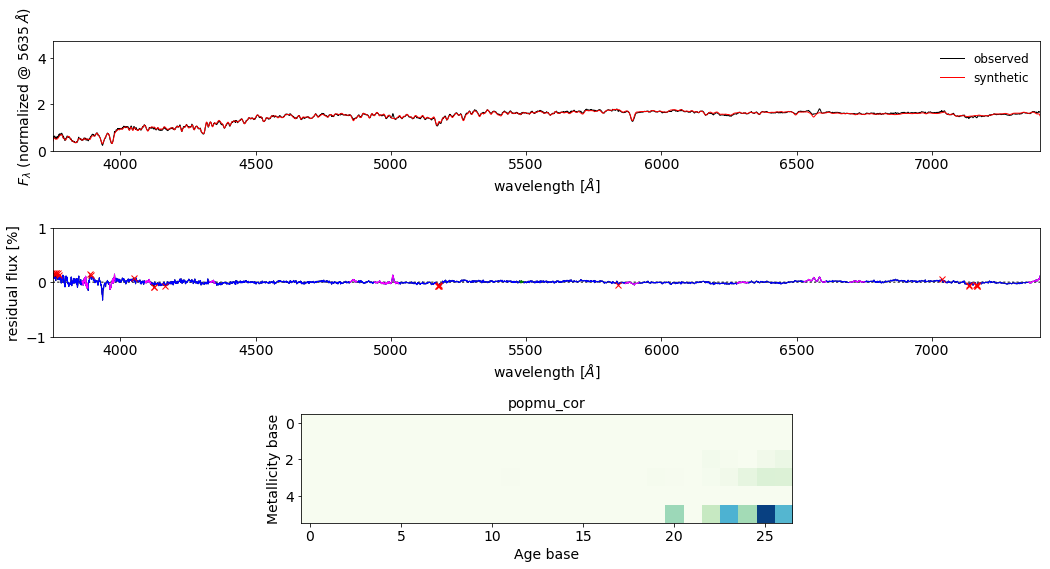

In [3]:
# Plotting the STARLIGHT results -----------------------------------------------------------------------------------------
output_path = '/home/mldantas/Documents/Disciplinas/Pop_Estelar_2017/Aula_STARLIGHT/STARLIGHT_exemplo/output'
object_01 = '1704.53178.167.cxt.out'
object_02 = '1802.53885.221.cxt.out'
ts = atpy.TableSet(os.path.join(output_path, object_01), type = 'starlightv4')
plot_spectra(ts)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in reciprocal


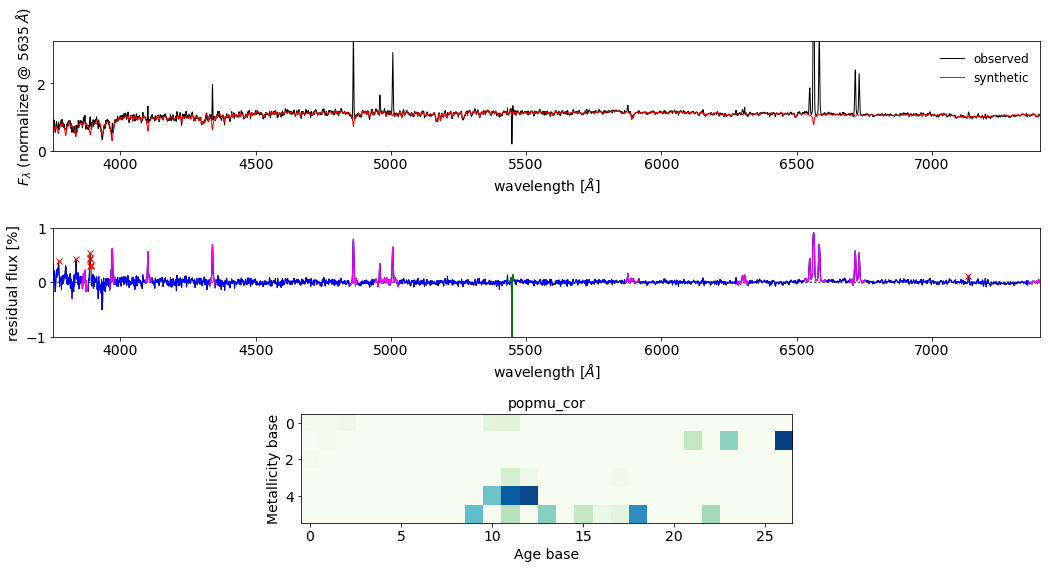

In [4]:
# Plotting the STARLIGHT results -----------------------------------------------------------------------------------------
ts = atpy.TableSet(os.path.join(output_path, object_02), type = 'starlightv4')
plot_spectra(ts)

In [5]:
pystarlight.io.starlighttable.read_set??

In [6]:
pystarlight.io.starlighttable.read_set('arq_spec', os.path.join(output_path, object_01))

AttributeError: 'str' object has no attribute 'reset'